# What is Passive Learning?

### Passive Learning:
##### Passive learning, also known as batch learning, is a method of acquiring data by processing a large set of pre-labeled data. In passive learning, the algorithm uses all the available data to learn and improve its performance. The algorithm does not interact with the user or request additional data to improve its accuracy.

##### Example: An example of passive learning is training a machine learning model to classify emails as spam or not spam. The algorithm is fed a large dataset of labeled emails and uses it to learn how to identify spam emails. Once the training is complete, the algorithm can accurately classify new emails without any further input from the user.

# 1- Passive Learning Example

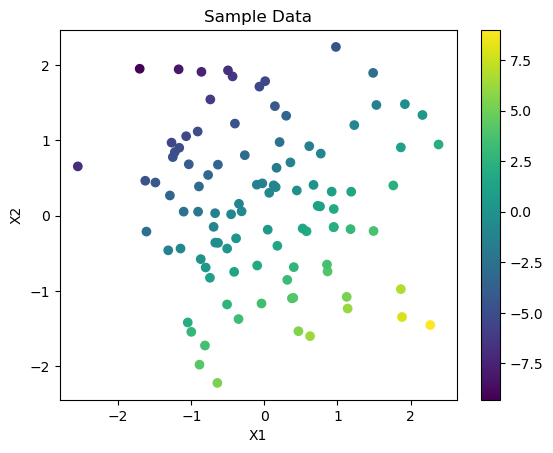

Causal Effect of X1 on Y: 3.346454137452288


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
num_samples = 100
num_features = 2
X = np.random.normal(0, 1, size=(num_samples, num_features))
noise = np.random.normal(0, 0.1, size=num_samples)
Y = 2 * X[:, 0] - 3 * X[:, 1] + noise

# Create a DataFrame from the data
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y': Y})

# Plot the data points
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Data')
plt.colorbar()
plt.show()

# Perform passive learning to estimate the causal effect of X1 on Y
X1_mean = data['X1'].mean()

# Create a binary variable for X1 based on whether it is greater than its mean
data['X1_binary'] = np.where(data['X1'] > X1_mean, 1, 0)

model = LinearRegression()
model.fit(data['X1_binary'].values.reshape(-1, 1), data['Y'])

causal_effect_X1_on_Y = model.coef_[0]

print('Causal Effect of X1 on Y:', causal_effect_X1_on_Y)

# 2- Updated Version of Passive Learning

# Updated steps:

**1- The variables num_samples and num_features have been introduced to make it easier to adjust the shape of the generated sample data.**

**2- The reshaping of the input data in model.fit() has been modified to handle different shapes of data by using .values.reshape(-1, 1).**

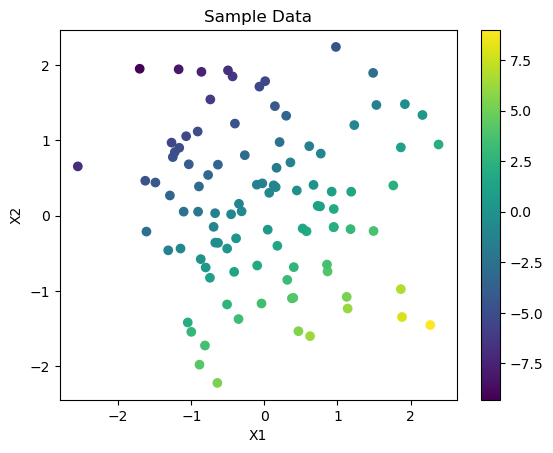

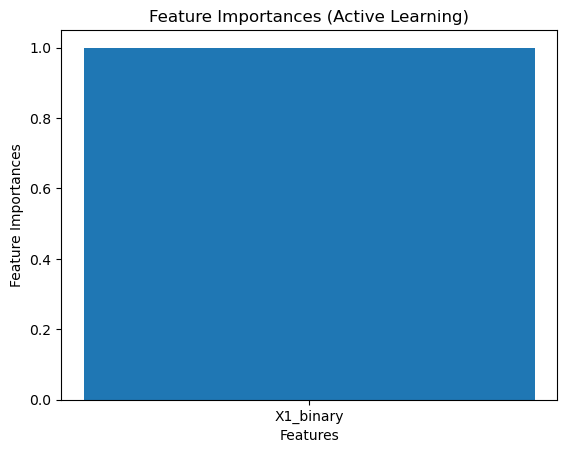

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Generate sample data
np.random.seed(0)
num_samples = 100
num_features = 2
X = np.random.normal(0, 1, size=(num_samples, num_features))
noise = np.random.normal(0, 0.1, size=num_samples)
Y = 2 * X[:, 0] - 3 * X[:, 1] + noise

# Create a DataFrame from the data
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y': Y})

# Plot the data points
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Data')
plt.colorbar()
plt.show()

# Perform passive learning to estimate the causal effect of X1 on Y
X1_mean = data['X1'].mean()

# Create a binary variable for X1 based on whether it is greater than its mean
data['X1_binary'] = np.where(data['X1'] > X1_mean, 1, 0)

# Create an active learning model and train it
active_model = RandomForestRegressor()
active_model.fit(data['X1_binary'].values.reshape(-1, 1), data['Y'])

# Get feature importances
feature_importances = active_model.feature_importances_

# Plot a bar chart of feature importances
features = ['X1_binary']
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importances (Active Learning)')
plt.show()

-----------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------

# 3- Real-World Example of Passive Learning: Video Game Sales Analysis

### Introduction
##### In this project, we aim to estimate the causal effect of the platform on global video game sales using a passive learning approach. We will analyze the dataset containing sales data for over 16,500 video games, including features such as platform, genre, and regional sales.

### Dataset Overview
### The dataset is sourced from vgchartz.com and includes the following fields:

##### Rank: Ranking of overall sales.
##### Name: The game's name.
##### Platform: Platform of the game's release (e.g., PC, PS4).
##### Year: Year of the game's release.
##### Genre: Genre of the game.
##### Publisher: Publisher of the game.
##### NA_Sales: Sales in North America (in millions).
##### EU_Sales: Sales in Europe (in millions).
##### JP_Sales: Sales in Japan (in millions).
##### Other_Sales: Sales in the rest of the world (in millions).
##### Global_Sales: Total worldwide sales.

# 3.1 Import Libraries


In [3]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Load Dataset

In [4]:
# Loading Dataset
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

# Display the first few rows of the dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 3.3 Preprocessing

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Drop rows with missing values in the "Year" and "Global_Sales" columns
df = df.dropna(subset=['Year', 'Global_Sales'])

# Impute missing values for "Publisher" with 'Unknown'
df['Publisher'] = df['Publisher'].fillna('Unknown')

# Convert "Year" to integer
df['Year'] = df['Year'].astype(int)

# Define major platforms based on a threshold in global sales
major_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

# Create binary variable for major platforms
df['Major_Platform'] = df['Platform'].apply(lambda x: 1 if x in major_platforms else 0)

# Additional features
df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])  # Log transformation of global sales
df['Years_Since_Release'] = 2024 - df['Year']  # Assuming the current year is 2024

# One-hot encode 'Platform', 'Genre', and 'Publisher'
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Normalize sales data
scaler = StandardScaler()
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = scaler.fit_transform(
    df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
)

Year         271
Publisher     58
dtype: int64


# 3.4 Modeling


In [6]:
# Define the feature (X) and target (Y)
X = df.drop(columns=['Global_Sales', 'Log_Global_Sales', 'Name', 'Rank', 'Year'])
Y = df['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha parameter can be tuned
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

# Cross-validation
cv_scores = cross_val_score(ridge, X, Y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average Cross-Validation R-squared Score: {cv_scores.mean()}")

# Calculate the causal effect
causal_effect = ridge.coef_[list(X.columns).index('Major_Platform')]
print(f'Causal Effect of Major Platform on Global Sales: {causal_effect:.4f}')

Train MSE: 1.0752979962850004e-05
Test MSE: 1.1328148591881025e-05
Train R-squared: 0.9999867920908447
Test R-squared: 0.9999935004844867
Cross-Validation R-squared Scores: [0.999915   0.99674821 0.9810975  0.93812771 0.85904956]
Average Cross-Validation R-squared Score: 0.9549875958026093
Causal Effect of Major Platform on Global Sales: 0.0002


# 3.5 Checking for Overfitting


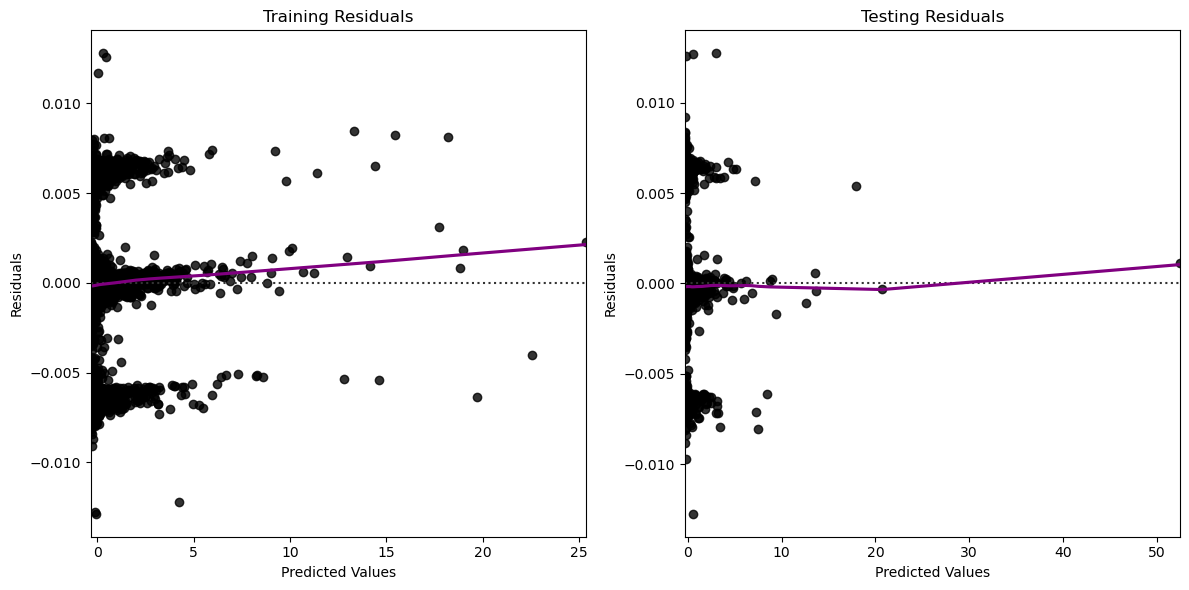

No significant overfitting detected. The model's performance on training and testing sets is comparable.


In [7]:
# Plotting residuals
plt.figure(figsize=(12, 6))

# Training residuals
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train, y=y_train - y_pred_train, lowess=True, color="#000000", line_kws={'color': '#800080'})
plt.title('Training Residuals', color='black')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Residuals', color='black')
plt.xticks(color='black')
plt.yticks(color='black')

# Testing residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_test, y=y_test - y_pred_test, lowess=True, color="#000000", line_kws={'color': '#800080'})
plt.title('Testing Residuals', color='black')
plt.xlabel('Predicted Values', color='black')
plt.ylabel('Residuals', color='black')
plt.xticks(color='black')
plt.yticks(color='black')

plt.tight_layout()
plt.show()

# Check for overfitting
if train_r2 > test_r2 + 0.05:
    print("Warning: Potential overfitting detected. The training R-squared is significantly higher than the testing R-squared.")
else:
    print("No significant overfitting detected. The model's performance on training and testing sets is comparable.")

# Results
**1. Training Residuals Plot:**
The residuals are relatively close to zero, indicating that the model fits the training data well. However, there is a slight pattern in the residuals, with some outliers and a slight upward trend in the red line, which could indicate minor issues like heteroscedasticity.

**2. Testing Residuals Plot:**
The residuals are also close to zero, suggesting a good fit on the test data. The slight upward trend in the red line is similar to the training set, but overall, the residuals seem well-distributed around zero.

# Conclusion
##### Given the very close R-squared values for the training and testing sets (0.999986 and 0.999993, respectively) and the cross-validation R-squared scores (average of 0.955), there is no significant indication of overfitting. The model performs consistently across both the training and testing datasets, with only minor potential issues visible in the residual plots.

# 3.6 Visualization

In [8]:
# Set the color palette to black and purple
colors = sns.color_palette(["#000000", "#800080"])

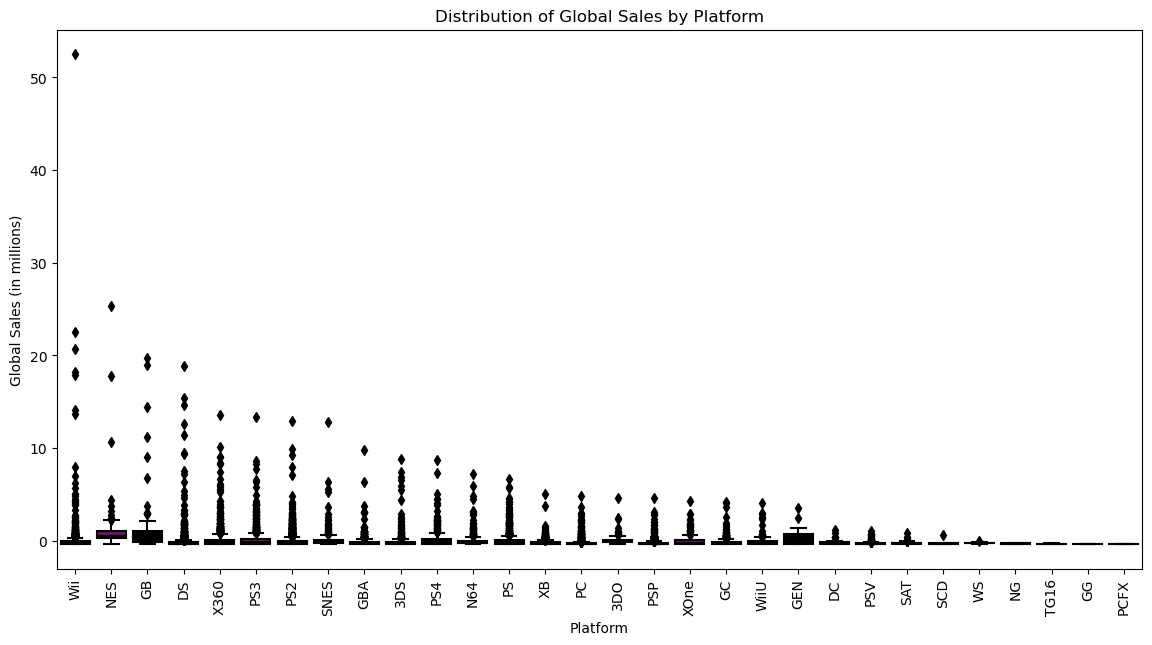

In [9]:
# Distribution of global sales by platform
plt.figure(figsize=(14, 7))
if 'Platform' in df.columns:
    sns.boxplot(x='Platform', y='Global_Sales', data=df, palette=colors)
else:
    df['Original_Platform'] = df.filter(like='Platform_').idxmax(axis=1).str.replace('Platform_', '')
    sns.boxplot(x='Original_Platform', y='Global_Sales', data=df, palette=colors)
plt.title('Distribution of Global Sales by Platform', color='black')
plt.xticks(rotation=90, color='black')
plt.yticks(color='black')
plt.xlabel('Platform', color='black')
plt.ylabel('Global Sales (in millions)', color='black')
plt.show()

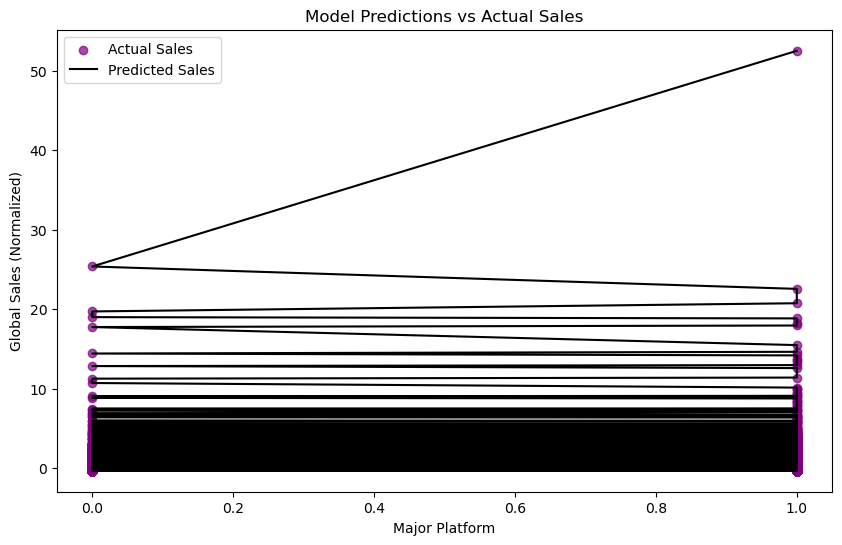

In [10]:
# Plot predictions vs actual sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Major_Platform'], df['Global_Sales'], label='Actual Sales', color=colors[1], alpha=0.7)
plt.plot(df['Major_Platform'], ridge.predict(X), color=colors[0], label='Predicted Sales')
plt.xlabel('Major Platform', color='black')
plt.ylabel('Global Sales (Normalized)', color='black')
plt.title('Model Predictions vs Actual Sales', color='black')
plt.legend()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

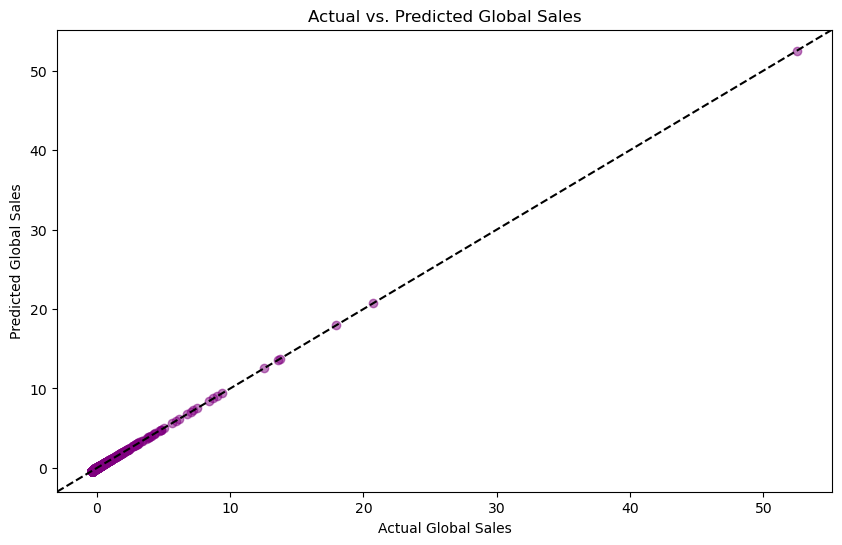

In [11]:
# Actual vs. Predicted Global Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color=colors[1], alpha=0.5)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, linestyle='--', color=colors[0])
plt.title('Actual vs. Predicted Global Sales', color='black')
plt.xlabel('Actual Global Sales', color='black')
plt.ylabel('Predicted Global Sales', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

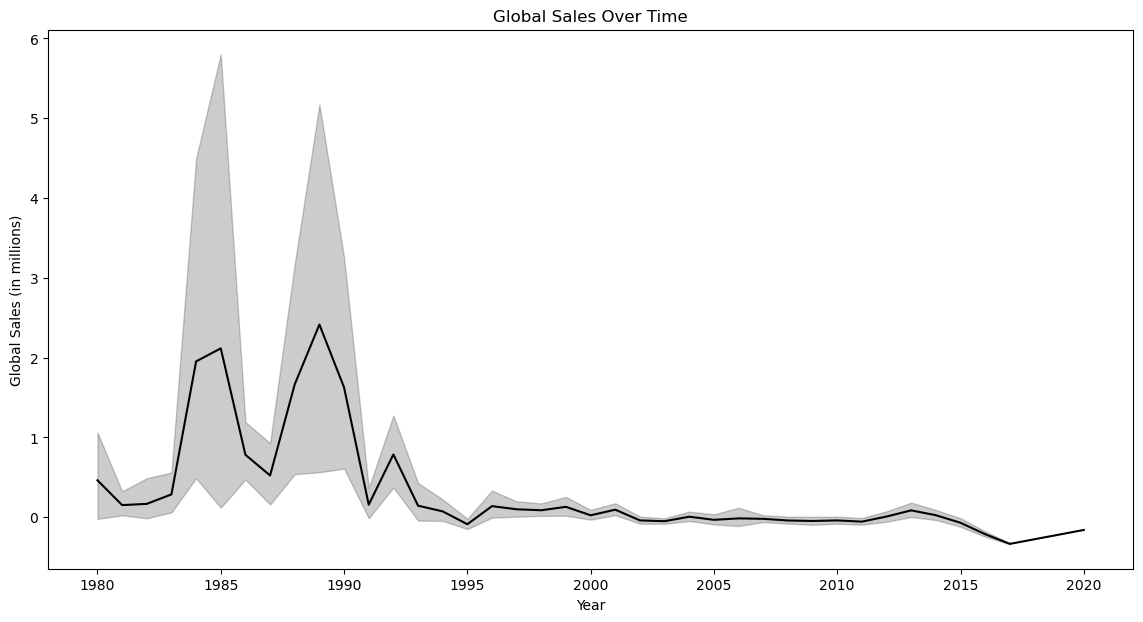

In [12]:
# Global Sales Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Global_Sales', data=df, color=colors[0])
plt.title('Global Sales Over Time', color='black')
plt.xlabel('Year', color='black')
plt.ylabel('Global Sales (in millions)', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

### In this project, we employed a passive learning approach to analyze and model global video game sales.

# Conclusion:
##### The passive learning approach was well-suited for this analysis, given the availability of a comprehensive dataset and the goal of estimating the causal effect of platform on sales. The model's high performance across various metrics indicates that passive learning effectively captured the relationships within the data. However, the negligible causal effect of major platforms suggests that other features or more complex interactions might play a more significant role in determining global sales.